# Property Prices in Dublin

In [1]:
# Import
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('../data/dublin_house_prices.csv')

In [3]:
df.shape

(9853, 10)

In [4]:
df.head()

,_id,Date,Address,Postal_Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2025,2019-02-21T00:00:00,"APT 8, THE GARDEN HOUSE, WATERFALL AVE",Dublin 3,Dublin,"€6,750,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,4513,2019-04-16T00:00:00,"49 AILESBURY RD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,"€6,750,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,9575,2019-08-01T00:00:00,"Block 1 and Block 2, Belleville, Castleknock",Dublin 7,Dublin,"€5,791,178.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,5013,2019-04-29T00:00:00,"THE GREY GABLES, 34A GILFORD ROAD, SANDYMOUNT",NaN,Dublin,"€5,425,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,4182,2019-04-10T00:00:00,"29 TEMPLE RD, DARTRY, DUBLIN 6",Dublin 6,Dublin,"€4,800,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [5]:

df.dtypes

_id                           int64
Date                         object
Address                      object
Postal_Code                  object
County                       object
Price                        object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object

In [6]:
df.head()

,_id,Date,Address,Postal_Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2025,2019-02-21T00:00:00,"APT 8, THE GARDEN HOUSE, WATERFALL AVE",Dublin 3,Dublin,"€6,750,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,4513,2019-04-16T00:00:00,"49 AILESBURY RD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,"€6,750,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,9575,2019-08-01T00:00:00,"Block 1 and Block 2, Belleville, Castleknock",Dublin 7,Dublin,"€5,791,178.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,5013,2019-04-29T00:00:00,"THE GREY GABLES, 34A GILFORD ROAD, SANDYMOUNT",NaN,Dublin,"€5,425,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,4182,2019-04-10T00:00:00,"29 TEMPLE RD, DARTRY, DUBLIN 6",Dublin 6,Dublin,"€4,800,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [8]:
df["Postal_Code"].value_counts()

Dublin 15    847
Dublin 24    573
Dublin 18    487
Dublin 11    402
Dublin 9     398
Dublin 8     376
Dublin 7     373
Dublin 13    361
Dublin 12    330
Dublin 4     323
Dublin 16    298
Dublin 5     278
Dublin 14    261
Dublin 3     258
Dublin 6     247
Dublin 22    225
Dublin 1     160
Dublin 2      97
Dublin 10     80
Dublin 20     67
Dublin 17     60
Dublin 6w     18
Name: Postal_Code, dtype: int64

In [12]:
num_price = df['Price'].replace( '[\€,) ]+','',regex=True ).replace( '[(]','-',     regex=True ).replace( '', 'NaN',     regex=True ).astype(float) 
df['num_price'] = num_price

In [13]:
df

,_id,Date,Address,Postal_Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,num_price
0,2025,2019-02-21T00:00:00,"APT 8, THE GARDEN HOUSE, WATERFALL AVE",Dublin 3,Dublin,6750000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,6750000.00
1,4513,2019-04-16T00:00:00,"49 AILESBURY RD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,6750000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,6750000.00
2,9575,2019-08-01T00:00:00,"Block 1 and Block 2, Belleville, Castleknock",Dublin 7,Dublin,5791178.00,No,No,Second-Hand Dwelling house /Apartment,NaN,5791178.00
3,5013,2019-04-29T00:00:00,"THE GREY GABLES, 34A GILFORD ROAD, SANDYMOUNT",NaN,Dublin,5425000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,5425000.00
4,4182,2019-04-10T00:00:00,"29 TEMPLE RD, DARTRY, DUBLIN 6",Dublin 6,Dublin,4800000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,4800000.00
...,...,...,...,...,...,...,...,...,...,...,...
9848,2324,2019-02-27T00:00:00,"65 WHITECHURCH WAY, BALLYBODEN, DUBLIN",Dublin 16,Dublin,12463.22,Yes,No,Second-Hand Dwelling house /Apartment,NaN,12463.22
9849,469,2019-01-18T00:00:00,"4 CAMBRIDGE TERRACE, RANELAGH, DUBLIN 6",Dublin 6,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,10000.00
9850,1519,2019-02-12T00:00:00,"67 GRANGE PARK RD, RAHENY, DUBLIN 5",Dublin 5,Dublin,8000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,8000.00
9851,3493,2019-03-27T00:00:00,"20 WATERSIDE GROVE, SWORDS ROAD, MALAHIDE",NaN,Dublin,8000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,8000.00


In [9]:
df['Price'] = df['Price'].replace( '[\€,) ]+','',regex=True ).replace( '[(]','-',     regex=True ).replace( '', 'NaN',     regex=True ).astype(float) 
df.describe()


,_id,Price
count,9853.000000,9.853000e+03
mean,4933.777834,4.160314e+05
std,2850.024868,3.256552e+05
min,1.000000,5.900000e+03
25%,2465.000000,2.650000e+05
50%,4935.000000,3.380000e+05
75%,7400.000000,4.581490e+05
max,9880.000000,6.750000e+06


In [10]:
df.describe()

,_id,Price
count,9853.000000,9.853000e+03
mean,4933.777834,4.160314e+05
std,2850.024868,3.256552e+05
min,1.000000,5.900000e+03
25%,2465.000000,2.650000e+05
50%,4935.000000,3.380000e+05
75%,7400.000000,4.581490e+05
max,9880.000000,6.750000e+06


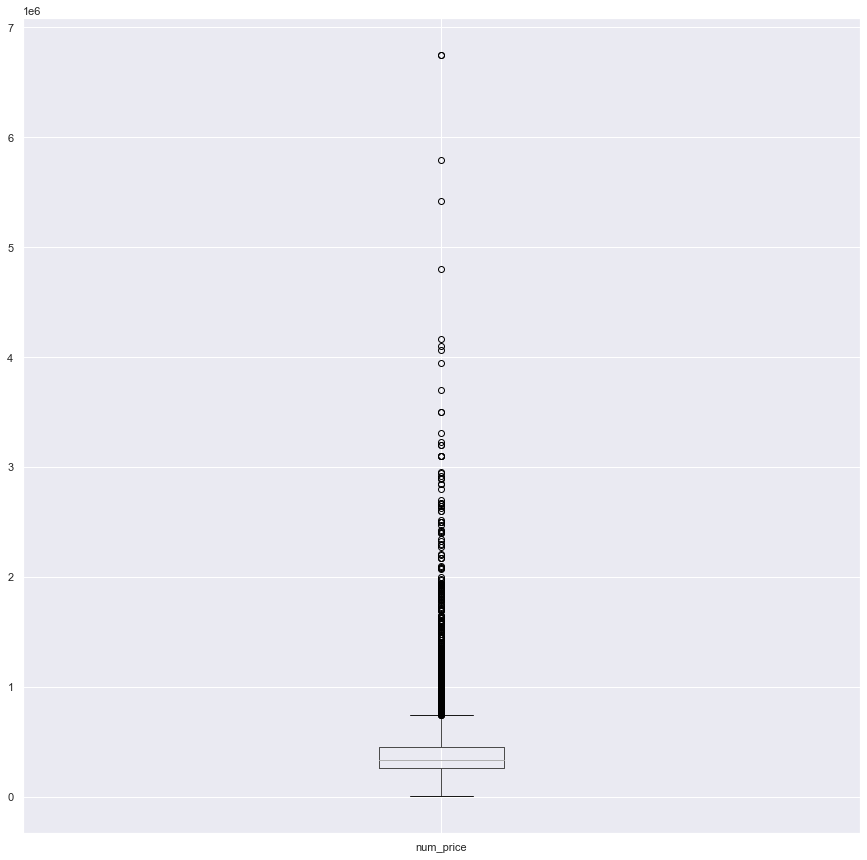

In [14]:
df.boxplot(column=['num_price'], return_type='axes',figsize=(15,15))

# show plot 
plt.show() 


<AxesSubplot:xlabel='num_price', ylabel='Postal_Code'>

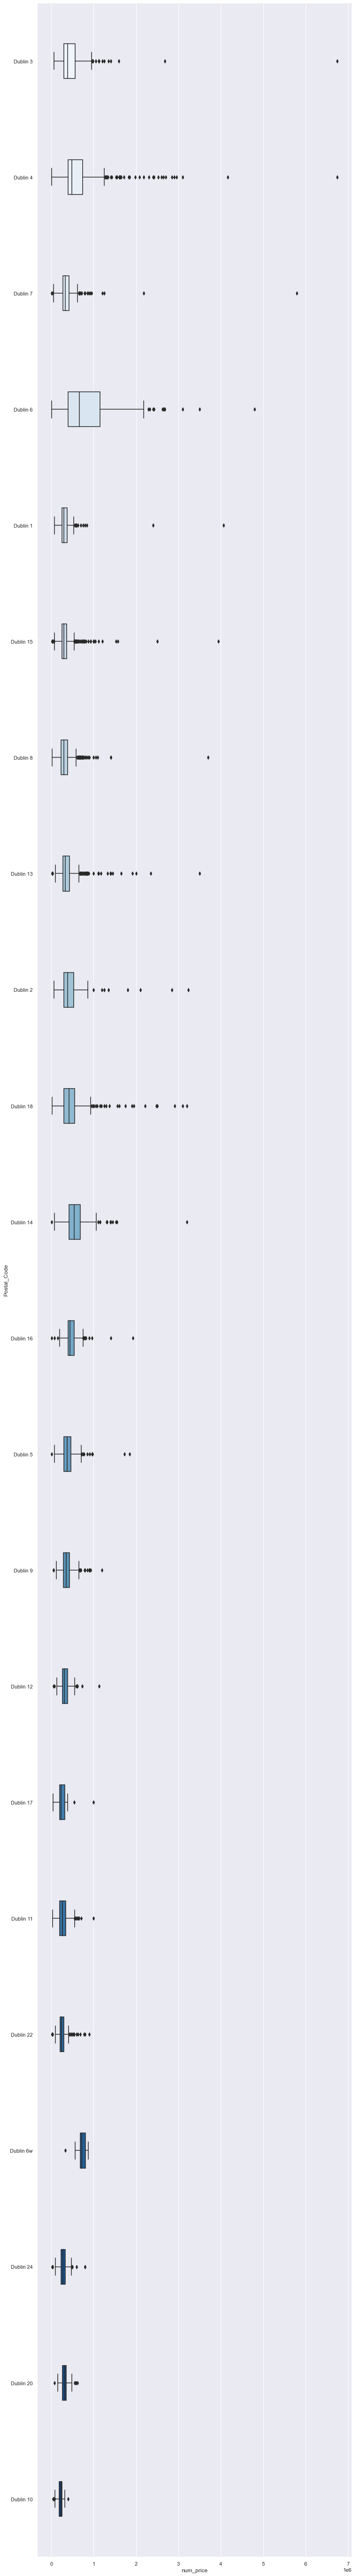

In [15]:
plt.figure(figsize=(12,100))
sns.boxplot( x=df["num_price"], y=df["Postal_Code"], palette="Blues", width=0.3)

In [ ]:
filt = (df['Postal_Code']=='Dublin 1')

In [ ]:
df[filt]

In [ ]:
filt = ((df['Postal_Code']=='Dublin 8') | (df['Postal_Code']=='Dublin 6')) & (df['num_price'] <= 3000000)
df1 = df.loc[filt, ['Postal_Code', 'Price','num_price']]

In [ ]:
df1

In [ ]:
df1
df1.boxplot(column='num_price',by='Postal_Code', figsize=(15,15))

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
sns.boxplot( y=df1["num_price"] )
plt.title("Dublin 8")
plt.ylabel("House Prices Euro") 
plt.tight_layout()
plt.show()


In [ ]:
df1.boxplot(column='num_price',by='Postal_Code', figsize=(15,15))

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot( x=df1["Postal_Code"], y=df1["num_price"], palette="Blues", width=0.3)

In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,10))

ax=sns.boxplot( x=df1["num_price"], y=df1["Postal_Code"], palette="Blues", width=0.3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [1]:
# Size in Inches
a4_dims = (11.7, 8.27)

#plt.figure(figsize=(15,10))

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=a4_dims, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
x= sns.boxplot(df1["num_price"], ax=ax_box)
sns.distplot(df1["num_price"], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')


NameError: name 'plt' is not defined

In [2]:
ax.figure.savefig('file.png')

NameError: name 'ax' is not defined